AL Transmission speed: 9
AL Point of Inflection: 49 Days since Outbreak
AL Maximum predicted No. of cases: 7663
Day of Inflection: 2020-04-07 00:00:00
End of the Infection Period: 2020-06-30 00:00:00



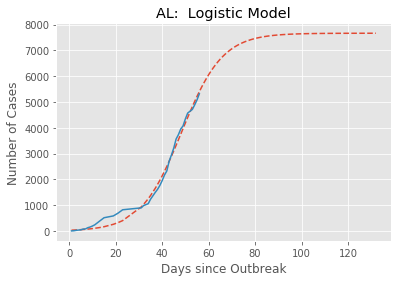

AZ Transmission speed: 7
AZ Point of Inflection: 55 Days since Outbreak
AZ Maximum predicted No. of cases: 5627
Day of Inflection: 2020-04-01 00:00:00
End of the Infection Period: 2020-06-06 00:00:00



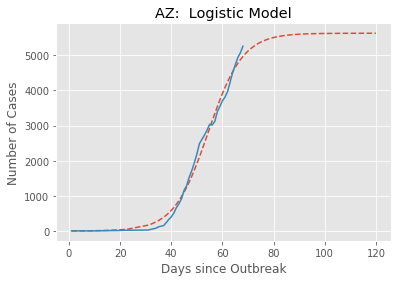

CA Transmission speed: 7
CA Point of Inflection: 70 Days since Outbreak
CA Maximum predicted No. of cases: 38756
Day of Inflection: 2020-04-02 00:00:00
End of the Infection Period: 2020-07-01 00:00:00



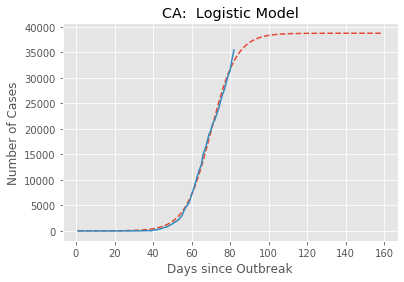

CO Transmission speed: 9
CO Point of Inflection: 49 Days since Outbreak
CO Maximum predicted No. of cases: 12664
Day of Inflection: 2020-04-03 00:00:00
End of the Infection Period: 2020-06-30 00:00:00



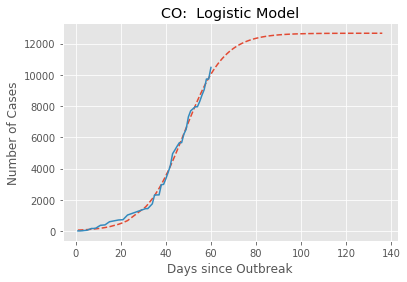

FL Transmission speed: 7
FL Point of Inflection: 52 Days since Outbreak
FL Maximum predicted No. of cases: 29655
Day of Inflection: 2020-04-01 00:00:00
End of the Infection Period: 2020-06-03 00:00:00



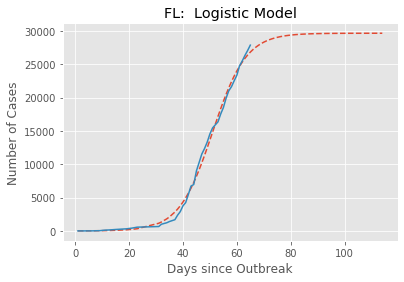

ID Transmission speed: 8
ID Point of Inflection: 38 Days since Outbreak
ID Maximum predicted No. of cases: 1846
Day of Inflection: 2020-03-27 00:00:00
End of the Infection Period: 2020-05-30 00:00:00



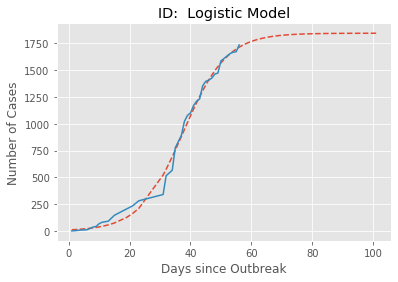

IL Transmission speed: 7
IL Point of Inflection: 65 Days since Outbreak
IL Maximum predicted No. of cases: 40841
Day of Inflection: 2020-04-05 00:00:00
End of the Infection Period: 2020-06-20 00:00:00



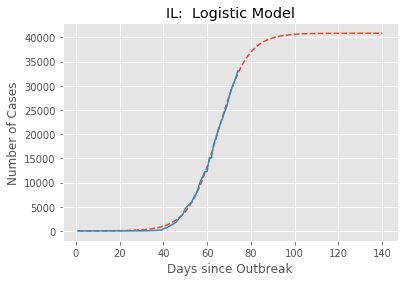

MA Transmission speed: 7
MA Point of Inflection: 56 Days since Outbreak
MA Maximum predicted No. of cases: 51732
Day of Inflection: 2020-04-06 00:00:00
End of the Infection Period: 2020-06-23 00:00:00



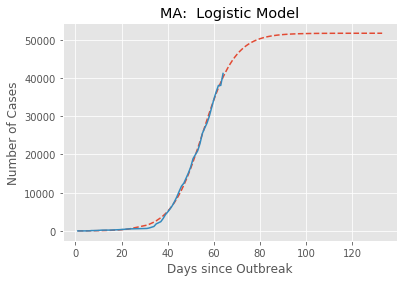

MI Transmission speed: 7
MI Point of Inflection: 43 Days since Outbreak
MI Maximum predicted No. of cases: 35505
Day of Inflection: 2020-03-30 00:00:00
End of the Infection Period: 2020-06-08 00:00:00



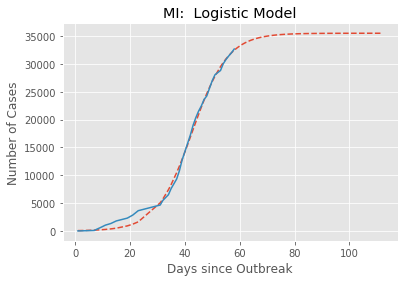

NV Transmission speed: 8
NV Point of Inflection: 47 Days since Outbreak
NV Maximum predicted No. of cases: 4320
Day of Inflection: 2020-03-31 00:00:00
End of the Infection Period: 2020-05-31 00:00:00



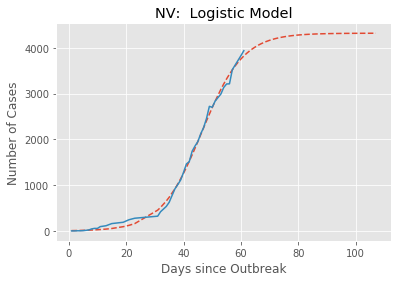

NJ Transmission speed: 7
NJ Point of Inflection: 50 Days since Outbreak
NJ Maximum predicted No. of cases: 100166
Day of Inflection: 2020-04-02 00:00:00
End of the Infection Period: 2020-06-15 00:00:00



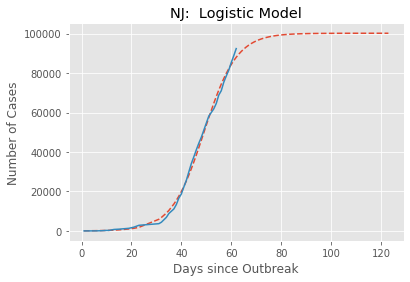

NY Transmission speed: 8
NY Point of Inflection: 53 Days since Outbreak
NY Maximum predicted No. of cases: 288658
Day of Inflection: 2020-03-31 00:00:00
End of the Infection Period: 2020-06-30 00:00:00



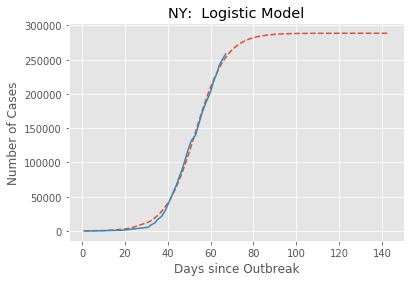

OR Transmission speed: 8
OR Point of Inflection: 50 Days since Outbreak
OR Maximum predicted No. of cases: 2250
Day of Inflection: 2020-03-31 00:00:00
End of the Infection Period: 2020-06-02 00:00:00



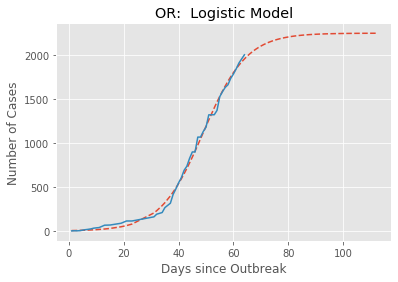

TN Transmission speed: 9
TN Point of Inflection: 47 Days since Outbreak
TN Maximum predicted No. of cases: 8830
Day of Inflection: 2020-04-01 00:00:00
End of the Infection Period: 2020-06-20 00:00:00



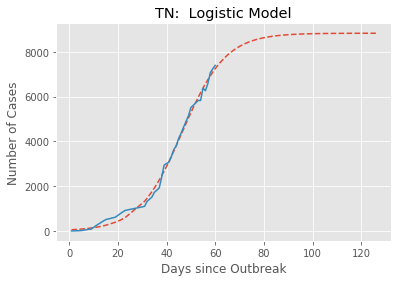

TX Transmission speed: 7
TX Point of Inflection: 58 Days since Outbreak
TX Maximum predicted No. of cases: 24071
Day of Inflection: 2020-04-04 00:00:00
End of the Infection Period: 2020-06-09 00:00:00



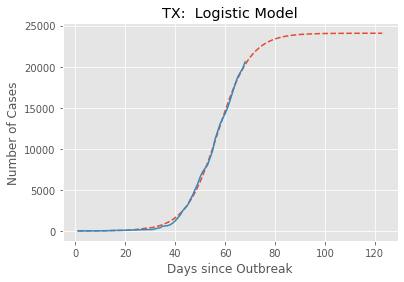

UT Transmission speed: 10
UT Point of Inflection: 48 Days since Outbreak
UT Maximum predicted No. of cases: 4169
Day of Inflection: 2020-04-03 00:00:00
End of the Infection Period: 2020-06-29 00:00:00



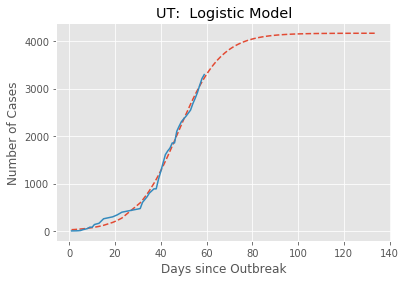

VA Transmission speed: 8
VA Point of Inflection: 53 Days since Outbreak
VA Maximum predicted No. of cases: 12743
Day of Inflection: 2020-04-07 00:00:00
End of the Infection Period: 2020-06-17 00:00:00



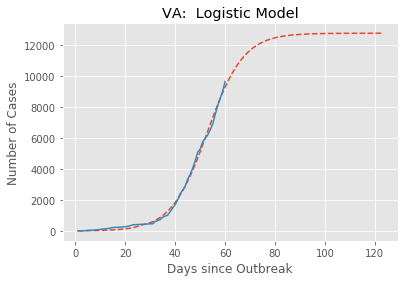

WA Transmission speed: 7
WA Point of Inflection: 63 Days since Outbreak
WA Maximum predicted No. of cases: 12936
Day of Inflection: 2020-03-27 00:00:00
End of the Infection Period: 2020-06-24 00:00:00



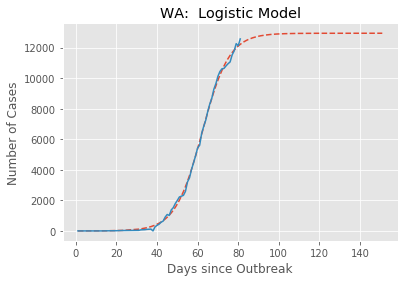

WI Transmission speed: 9
WI Point of Inflection: 48 Days since Outbreak
WI Maximum predicted No. of cases: 5568
Day of Inflection: 2020-04-01 00:00:00
End of the Infection Period: 2020-06-24 00:00:00



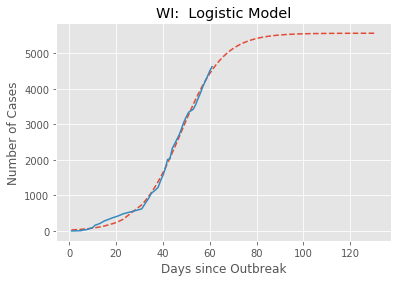

WY Transmission speed: 12
WY Point of Inflection: 48 Days since Outbreak
WY Maximum predicted No. of cases: 521
Day of Inflection: 2020-04-05 00:00:00
End of the Infection Period: 2020-06-21 00:00:00



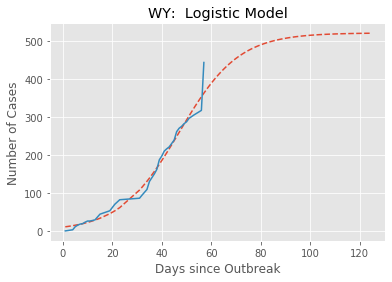

DC Transmission speed: 9
DC Point of Inflection: 50 Days since Outbreak
DC Maximum predicted No. of cases: 4270
Day of Inflection: 2020-04-07 00:00:00
End of the Infection Period: 2020-06-30 00:00:00



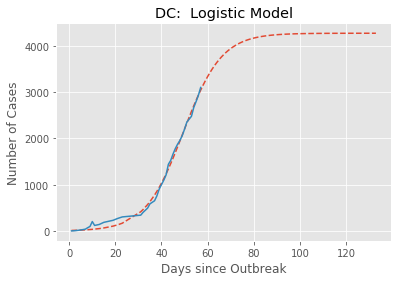

In [16]:
from datetime import datetime
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math
state_inf = []
import pandas as pd
peakinf = []
df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\usaCLEANCDRdata.csv')
%matplotlib inline

plt.style.use('ggplot')
Dates = df.groupby("Last Update")
df1 = Dates.count()

abb = ["AL", "AZ",  "CA", "CO", "FL",  "ID", "IL", "MA", "MI", "NV", "NJ", "NY",
       "OR", "TN", "TX", "UT", "VA", "WA", "WI", "WY", "DC"]

for x in abb:
     
    Dates = list(df1.index.values)
    state = df[df["Province/State"] == x]
    
    dAZ = state.groupby("Last Update")
    dAZ = dAZ.sum()
    dAZ= list(dAZ["Confirmed"].values)
    
    length = len(dAZ)
    dfDate = pd.DataFrame(Dates[0:length])
    
    WICases = pd.DataFrame({"Arizona": dAZ})
    WICases = pd.concat([dfDate,WICases], axis=1, sort = False)
    WICases = WICases.rename(columns={0: "Date"})
    
    FMT = '%m/%d/%Y'
    days = WICases['Date']
    numday = []
    
    from datetime import datetime 
    for a in days:
        y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
        z = y.days
        numday.append(z)
    
    Day = numday
    Cases = list(WICases.iloc[:,1])
    

    
    import numpy as np
    def LogisticModel(x,v,t,c):
        return c/(1+np.exp(-(x-t)/v))
    
    fit = curve_fit(LogisticModel,Day,Cases,p0=[2,60,75000])
    params = fit[0]
    v = params[0]
    t = params[1]
    c = params[2]
    vel=math.ceil(v)
    POI=math.ceil(t)
    MAX=math.ceil(c)
    print(x + " Transmission speed: " +  str(vel) )
    print(x + " Point of Inflection: " + str(POI) + " Days since Outbreak")
    print(x + " Maximum predicted No. of cases: " + str(MAX) )
    infcases = Cases[int(t)-10]
    state_inf.append(math.ceil(infcases))
    import math
    finishday = t
    finishday = math.ceil(finishday)
    startdate = "01/21/2020"
    startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
    
    enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
    print("Day of Inflection: " + str(enddate))
    
    sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
    
    enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
    print("End of the Infection Period: " + str(enddate)+ '\n')
    title=str(x)
    
    pred_x = list(range(max(Day),sol))
    
    Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
    
    
    #a=plt.subplot(5,5, abb.index(x)+1)
    plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
    plt.plot(Day, Cases, label="COVID-19 Data")
    plt.title(title+':  Logistic Model')
    plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
    plt.show()



In [17]:
import seaborn as sns
sns.set()
#sns.pairplot(data)#, hue="Language");

In [18]:
df1 = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\Nation_HealthSurvey_Variables.csv")

df2 = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANHospitals.csv")

df3 = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANpopulation_and_population_density_USA.csv")

df4 = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\usaCLEANCDRData.csv")

states = ["Alabama", "Arizona", "California", "Colorado",
          "Florida", "Idaho", "Illinois", "Massachusetts", "Michigan", 
          "Nevada", "New Jersey", "New York", 
          "Oregon","Tennessee", "Texas", "Utah", "Virginia", "Washington", 
          "Wisconsin", "Wyoming", "District of Columbia"]

abb = ["AL", "AZ",  "CA", "CO", "FL",  "ID", "IL", "MA", "MI", "NV", "NJ", "NY","OR", "TN", "TX", "UT", "VA", "WA", "WI", "WY", "DC"]
df5=pd.DataFrame()



states = ["Alabama", "Arizona", "California", "Colorado",
          "Florida", "Idaho", "Illinois", "Massachusetts", "Michigan", 
          "Nevada", "New Jersey", "New York", 
          "Oregon","Tennessee", "Texas", "Utah", "Virginia", "Washington", 
          "Wisconsin", "Wyoming", "District of Columbia"]

abb = ["AL", "AZ",  "CA", "CO", "FL",  "ID", "IL", "MA", "MI", "NV", "NJ", "NY","OR", "TN", "TX", "UT", "VA", "WA", "WI", "WY", "DC"]
df5=pd.DataFrame()

for x in range(len(abb)):
   
    state = df4[df4["Province/State"] == abb[x]]
    df5 = df5.append(state, ignore_index = True)
    df5["Province/State"] = df5["Province/State"].replace(abb[x],states[x])
    
    
df5 = df5[df5["Last Update"] == "04/21/2020"]

groupData = df5.groupby("Province/State")
df5 = groupData.sum()

df1 = df1.rename(columns = {"State": "Province/State","# Primary Care Physicians":"Primary Care Physicians"})
df1 = df1.set_index('Province/State')

df2 = df2.rename(columns={"Location": "Province/State"})
df2 = df2.rename(columns ={"Total": "Total Beds"})
df2 = df2.set_index('Province/State')
df3 = df3.rename(columns = {"State": "Province/State"})
df3 = df3.set_index('Province/State')

df5 = df5[["Confirmed"]]
df5

df = pd.concat([df1,df2], axis=1, sort = False)
df = pd.concat([df, df3], axis = 1, sort = False)
df = pd.concat([df, df5], axis = 1, sort = False)
#df = df.drop('Deaths', axis=1)
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('%', 'Perc')
df.columns = df.columns.str.replace('-', '')
df.columns = df.columns.str.replace('.', '')

df=df.dropna()

df["PercConfirmed"]=df["Confirmed"]
df=df.drop('Confirmed',axis=1)
df['POI']=state_inf
df['POI']=df['POI']/(df["Pop"]/100)
df

Deaths  YearsofPotentialLifeLostRate  \
Alabama                81791.0                        9943.0   
Arizona                80394.0                        7075.0   
California            347916.0                        5260.0   
Colorado               52817.0                        5944.0   
District of Columbia    8387.0                        8111.0   
Florida               263456.0                        7260.0   
Idaho                  18014.0                        6310.0   
Illinois              143465.0                        6683.0   
Massachusetts          67991.0                        5706.0   
Michigan              131680.0                        7626.0   
Nevada                 38133.0                        7270.0   
New Jersey             91120.0                        5906.0   
New York              191428.0                        5456.0   
Oregon                 46659.0                        5953.0   
Tennessee             106691.0                        9285.0   
Texas                 297317.0                        6651.0   
Utah                   24654.0                        6032.0   
Virginia               94324.0                        6411.0   
Washington             74525.0                        5594.0   
Wisconsin              63747.0                        6366.0   
Wyoming                 6956.0                        7104.0   

                      AverageNumberofPhysicallyUnhealthyDays  \
Alabama                                                  4.9   
Arizona                                                  4.0   
California                                               3.5   
Colorado                                                 3.4   
District of Columbia                                     2.9   
Florida                                                  3.7   
Idaho                                                    3.6   
Illinois                                                 3.8   
Massachusetts                                            3.5   
Michigan                                                 4.3   
Nevada                                                   3.9   
New Jersey                                               3.7   
New York                                                 3.5   
Oregon                                                   4.2   
Tennessee                                                4.2   
Texas                                                    3.7   
Utah                                                     3.5   
Virginia                                                 3.5   
Washington                                               3.9   
Wisconsin                                                3.9   
Wyoming                                                  3.5   

                      AverageNumberofMentallyUnhealthyDays  PercSmokers  \
Alabama                                                4.9           21   
Arizona                                                4.0           16   
California                                             3.5           11   
Colorado                                               3.8           15   
District of Columbia                                   3.6           16   
Florida                                                4.0           16   
Idaho                                                  3.6           14   
Illinois                                               3.8           15   
Massachusetts                                          4.0           14   
Michigan                                               4.4           19   
Nevada                                                 3.5           18   
New Jersey                                             3.9           14   
New York                                               3.9           14   
Oregon                                                 4.8           16   
Tennessee                                              4.4           23   
Texas 

Deaths                                    0.415082
YearsofPotentialLifeLostRate              0.131138
AverageNumberofPhysicallyUnhealthyDays    0.377035
AverageNumberofMentallyUnhealthyDays      0.417814
PercSmokers                               0.003583
PercAdultswithObesity                     0.335618
FoodEnvironmentIndex                      0.232333
PercPhysicallyInactive                    0.039864
PercWithAccesstoExerciseOpportunities     0.384327
ChlamydiaRate                             0.476767
PercUninsured                             0.107630
PrimaryCarePhysicians                     0.368667
PrimaryCarePhysiciansRate                 0.257434
PreventableHospitalizationRate            0.141981
PercVaccinated                            0.456262
HighSchoolGraduationRate                  0.298474
PercSomeCollege                           0.220183
PercUnemployed                            0.402646
PercChildreninPoverty                     0.160022
IncomeRatio                    

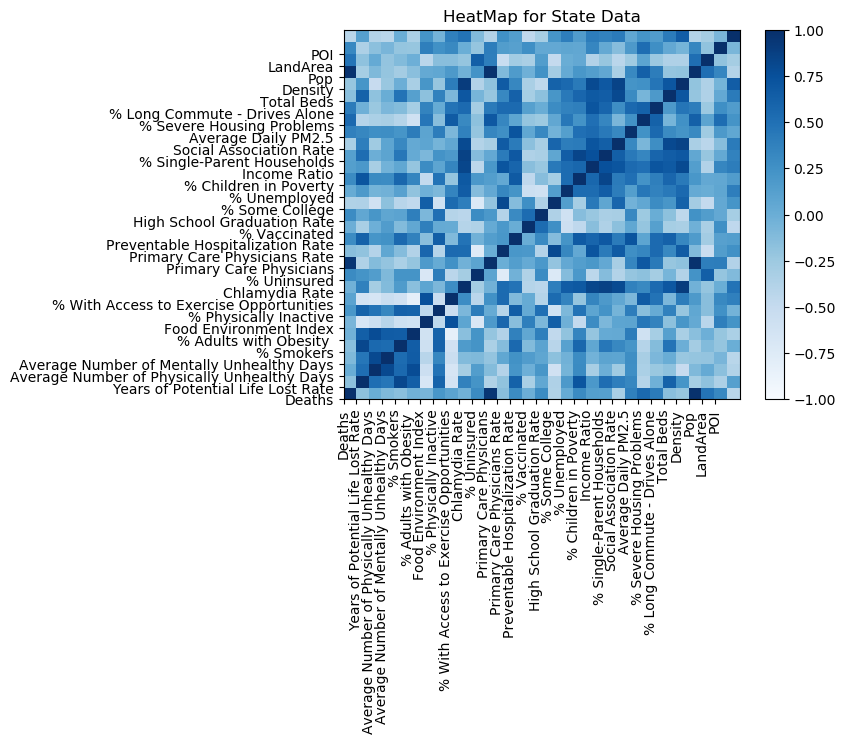

In [19]:
corr_m = df.corr()
plt.style.use('default')
heatmap = plt.pcolor(corr_m, vmin = -1, vmax = 1, cmap=plt.cm.Blues)
# plot the legend on the side
plt.colorbar(heatmap)

plt.xticks((np.arange(0, 30, step=1)), ['Deaths','Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', 'Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'POI'], rotation = 90)
plt.yticks((np.arange(0, 30, step=1)), ['Deaths','Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', 'Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'POI'], rotation = 0)

plt.title("HeatMap for State Data")
casescorr=corr_m['POI']
casescorr.abs()

In [59]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="POI~  Deaths + Density + AverageNumberofPhysicallyUnhealthyDays + PercVaccinated + SocialAssociationRate + AverageNumberofMentallyUnhealthyDays + IncomeRatio + TotalBeds", data=df).fit()
peak_infections_linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    POI   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     4.873
Date:                Wed, 22 Apr 2020   Prob (F-statistic):            0.00730
Time:                        21:03:47   Log-Likelihood:                -12.613
No. Observations:                  21   AIC:                             43.23
Df Residuals:                      12   BIC:                             52.63
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  3.0819      2.620      1.176      0.262      -2.626       8.790
Deaths                                 -5.098e-06   1.86e-06     -2.746      0.018   -9.14e-06   -1.05e-06
Density                                    0.0002      0.000      1.251      0.235      -0.000       0.001
AverageNumberofPhysicallyUnhealthyDays     1.0072      0.785      1.283      0.224      -0.703       2.717
PercVaccinated                            -0.0339      0.041     -0.832      0.422      -0.123       0.055
SocialAssociationRate                     -0.0720      0.076     -0.941      0.365      -0.239       0.095
AverageNumberofMentallyUnhealthyDays      -1.5469      0.802     -1.928      0.078      -3.295       0.201
IncomeRatio                                0.4613      0.422      1.092      0.296      -0.459       1.382
TotalBeds                                  0.0810      0.379      0.214      0.834      -0.744       0.907
==============================================================================
Omnibus:                       11.298   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.191
Skew:                           1.111   Prob(JB):                      0.00613
Kurtosis:                       5.591   Cond. No.                     2.93e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="POI~ PercPhysicallyInactive + PrimaryCarePhysicians + PercSevereHousingProblems + FoodEnvironmentIndex  + PercVaccinated + TotalBeds + AverageNumberofPhysicallyUnhealthyDays + YearsofPotentialLifeLostRate", data=df).fit()
peak_infections_linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    POI   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     6.473
Date:                Wed, 22 Apr 2020   Prob (F-statistic):            0.00220
Time:                        21:04:13   Log-Likelihood:                -10.261
No. Observations:                  21   AIC:                             38.52
Df Residuals:                      12   BIC:                             47.92
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.9070      2.766      0.689      0.504      -4.120       7.934
PercPhysicallyInactive                     0.0860      0.049      1.767      0.103      -0.020       0.192
PrimaryCarePhysicians                  -9.164e-05    2.7e-05     -3.398      0.005      -0.000   -3.29e-05
PercSevereHousingProblems                  0.1135      0.065      1.743      0.107      -0.028       0.255
FoodEnvironmentIndex                       0.3668      0.218      1.680      0.119      -0.109       0.842
PercVaccinated                            -0.1040      0.043     -2.434      0.032      -0.197      -0.011
TotalBeds                                 -0.2565      0.367     -0.699      0.498      -1.056       0.543
AverageNumberofPhysicallyUnhealthyDays    -1.0201      0.527     -1.934      0.077      -2.169       0.129
YearsofPotentialLifeLostRate               0.0003      0.000      0.992      0.341      -0.000       0.001
==============================================================================
Omnibus:                        0.448   Durbin-Watson:                   2.471
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.381
Skew:                           0.287   Prob(JB):                        0.827
Kurtosis:                       2.675   Cond. No.                     2.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="POI~ Density + SocialAssociationRate + PercSmokers + PrimaryCarePhysicians + ChlamydiaRate +FoodEnvironmentIndex  + PercVaccinated ", data=df).fit()
peak_infections_linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    POI   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     12.01
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           9.07e-05
Time:                        21:14:01   Log-Likelihood:                -6.6946
No. Observations:                  21   AIC:                             29.39
Df Residuals:                      13   BIC:                             37.75
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.7338      1.590      1.090      0.295      -1.702       5.169
Density                   0.0007      0.000      4.677      0.000       0.000       0.001
SocialAssociationRate    -0.1613      0.051     -3.190      0.007      -0.270      -0.052
PercSmokers               0.2013      0.056      3.591      0.003       0.080       0.322
PrimaryCarePhysicians -2.375e-05   1.65e-05     -1.437      0.174   -5.94e-05    1.19e-05
ChlamydiaRate            -0.0042      0.001     -2.803      0.015      -0.007      -0.001
FoodEnvironmentIndex      0.4974      0.130      3.819      0.002       0.216       0.779
PercVaccinated           -0.1075      0.030     -3.597      0.003      -0.172      -0.043
==============================================================================
Omnibus:                        1.319   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                0.928
Skew:                           0.500   Prob(JB):                        0.629
Kurtosis:                       2.754   Cond. No.                     1.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""